In [1]:
import pandas as pd
import matplotlib.pyplot  as plt

In [37]:
data = pd.read_csv('query_log_clear.csv', sep="@")
data['godate'] = pd.to_datetime(data['godate'])
data['stamp'] = pd.to_datetime(data['stamp'])
data['date'] = pd.to_datetime(data['date'])

In [9]:
booking = data.loc[data['section'].isin(['trip-book'])]

In [38]:
booking.head()

,log_id,section,refid,from_name,to_name,godate,ip,lang_id,fxcode,device,agent,referer,landing,message,agent_id,stamp,date
33,40289887,trip-book,46149,Phnom Penh Mekong Express,Siem Reap,2017-09-21 12:30:00,96.9.69.94,en,THB,Phone,Mozilla/5.0 (Linux; Android 7.0; WAS-LX1A Buil...,http://www.google.com.kh/,https://12go.asia/en/bus/phnom-penh/siem-reap?...,Pushed pay button,354628,2017-09-20 20:30:28,2017-09-20
39,40289873,trip-book,18412,Hanoi,Sapa Lao Cai,2017-10-10 21:30:00,83.115.90.102,fr,EUR,Desktop,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,https://12go.asia/,Pushed pay button,0,2017-09-20 20:30:16,2017-09-20
60,40289831,trip-book,16613,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,134.196.11.247,de,THB,Phone,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,https://zugreiseblog.de/wp-content/forms/12go-...,https://12go.asia/de/travel/bangkok/chiang-mai...,Pushed pay button,4,2017-09-20 20:29:36,2017-09-20
74,40289798,trip-book,44803,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,84.253.50.97,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Pushed pay button,30245,2017-09-20 20:29:13,2017-09-20
263,40289369,trip-book,14019,Phuket Lomprayah,Na Thon (Koh Samui),2017-09-23 10:00:00,183.88.110.56,de,THB,Tablet,Mozilla/5.0 (iPad; CPU OS 10_3_2 like Mac OS X...,https://www.google.de/,https://12go.asia/de/travel/phuket/koh-samui,Pushed pay button,0,2017-09-20 20:23:41,2017-09-20


In [20]:
booking_ips = list(booking['ip'].unique())

In [41]:
form_and_booking = data[(data['ip'].isin(booking_ips)) & (data['section']=='trip-form')]
form_and_booking

,log_id,section,refid,from_name,to_name,godate,ip,lang_id,fxcode,device,agent,referer,landing,message,agent_id,stamp,date
14,40289927,trip-form,16613,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,134.196.11.247,de,THB,Phone,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,https://zugreiseblog.de/wp-content/forms/12go-...,https://12go.asia/de/travel/bangkok/chiang-mai...,Opened booking form,4,2017-09-20 20:31:03,2017-09-20
199,40289510,trip-form,44803,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,84.253.50.97,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:25:46,2017-09-20
200,40289507,trip-form,44727,Khao Ta Kiab pier,Bali Hai Pier,2017-09-25 13:00:00,84.253.50.97,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:25:46,2017-09-20
215,40289477,trip-form,44803,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,84.253.50.97,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:25:02,2017-09-20
216,40289474,trip-form,44727,Khao Ta Kiab pier,Bali Hai Pier,2017-09-25 13:00:00,84.253.50.97,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:25:02,2017-09-20
230,40289441,trip-form,44803,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,84.253.50.97,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:24:33,2017-09-20
231,40289438,trip-form,44727,Khao Ta Kiab pier,Bali Hai Pier,2017-09-25 13:00:00,84.253.50.97,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:24:33,2017-09-20
261,40289374,trip-form,46149,Phnom Penh Mekong Express,Siem Reap,2017-09-21 12:30:00,96.9.69.94,en,THB,Phone,Mozilla/5.0 (Linux; Android 7.0; WAS-LX1A Buil...,http://www.google.com.kh/,https://12go.asia/en/bus/phnom-penh/siem-reap?...,Opened booking form,354628,2017-09-20 20:23:43,2017-09-20
413,40289036,trip-form,14019,Phuket Lomprayah,Na Thon (Koh Samui),2017-09-23 10:00:00,183.88.110.56,de,THB,Tablet,Mozilla/5.0 (iPad; CPU OS 10_3_2 like Mac OS X...,https://www.google.de/,https://12go.asia/de/travel/phuket/koh-samui,Opened booking form,0,2017-09-20 20:18:52,2017-09-20
430,40288994,trip-form,16613,Hua Lamphong,Chiang Mai,2017-09-25 22:00:00,134.196.11.247,de,THB,Phone,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,https://zugreiseblog.de/wp-content/forms/12go-...,https://12go.asia/de/travel/bangkok/chiang-mai...,Opened booking form,4,2017-09-20 20:18:26,2017-09-20


In [55]:
form_and_book_merged = booking.merge(form_and_booking, on='ip')
form_and_book_merged

,log_id_x,section_x,refid_x,from_name_x,to_name_x,godate_x,ip,lang_id_x,fxcode_x,device_x,...,lang_id_y,fxcode_y,device_y,agent_y,referer_y,landing_y,message_y,agent_id_y,stamp_y,date_y
0,40289887,trip-book,46149,Phnom Penh Mekong Express,Siem Reap,2017-09-21 12:30:00,96.9.69.94,en,THB,Phone,...,en,THB,Phone,Mozilla/5.0 (Linux; Android 7.0; WAS-LX1A Buil...,http://www.google.com.kh/,https://12go.asia/en/bus/phnom-penh/siem-reap?...,Opened booking form,354628,2017-09-20 20:23:43,2017-09-20
1,40289873,trip-book,18412,Hanoi,Sapa Lao Cai,2017-10-10 21:30:00,83.115.90.102,fr,EUR,Desktop,...,fr,EUR,Desktop,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,https://12go.asia/,Opened booking form,0,2017-09-20 20:14:07,2017-09-20
2,40289831,trip-book,16613,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,134.196.11.247,de,THB,Phone,...,de,THB,Phone,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,https://zugreiseblog.de/wp-content/forms/12go-...,https://12go.asia/de/travel/bangkok/chiang-mai...,Opened booking form,4,2017-09-20 20:31:03,2017-09-20
3,40289831,trip-book,16613,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,134.196.11.247,de,THB,Phone,...,de,THB,Phone,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,https://zugreiseblog.de/wp-content/forms/12go-...,https://12go.asia/de/travel/bangkok/chiang-mai...,Opened booking form,4,2017-09-20 20:18:26,2017-09-20
4,40289831,trip-book,16613,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,134.196.11.247,de,THB,Phone,...,de,THB,Phone,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,https://zugreiseblog.de/wp-content/forms/12go-...,https://12go.asia/de/travel/bangkok/chiang-mai...,Opened booking form,4,2017-09-20 20:18:26,2017-09-20
5,40289831,trip-book,16613,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,134.196.11.247,de,THB,Phone,...,de,THB,Phone,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,https://zugreiseblog.de/wp-content/forms/12go-...,https://12go.asia/de/travel/bangkok/chiang-mai...,Opened booking form,4,2017-09-20 20:15:57,2017-09-20
6,40289831,trip-book,16613,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,134.196.11.247,de,THB,Phone,...,de,THB,Phone,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,https://zugreiseblog.de/wp-content/forms/12go-...,https://12go.asia/de/travel/bangkok/chiang-mai...,Opened booking form,4,2017-09-20 20:07:25,2017-09-20
7,40289798,trip-book,44803,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,84.253.50.97,de,THB,Desktop,...,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:25:46,2017-09-20
8,40289798,trip-book,44803,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,84.253.50.97,de,THB,Desktop,...,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:25:46,2017-09-20
9,40289798,trip-book,44803,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,84.253.50.97,de,THB,Desktop,...,de,THB,Desktop,Mozilla/5.0 (Windows NT 6.1; Win64; x64; Tride...,https://www.pattayaunlimited.com/pattaya-to-hu...,https://12go.asia/en/ferry/bali-hai-pier/hua-h...,Opened booking form,30245,2017-09-20 20:25:02,2017-09-20


In [94]:
result = pd.DataFrame(columns=['ip', 'stamp_form', 'stamp_book', 'from_name_book', 'to_name_book', 'godate_book', 'device'])
result['ip'] = form_and_book_merged['ip']
result['stamp_form'] = form_and_book_merged['stamp_y']
result['stamp_book'] = form_and_book_merged['stamp_x']
result['from_name_book'] = form_and_book_merged['from_name_x']
result['to_name_book'] = form_and_book_merged['to_name_x']
result['godate_book'] = form_and_book_merged['godate_x']
result['device'] = form_and_book_merged['device_y']
result

,ip,stamp_form,stamp_book,from_name_book,to_name_book,godate_book,device
0,96.9.69.94,2017-09-20 20:23:43,2017-09-20 20:30:28,Phnom Penh Mekong Express,Siem Reap,2017-09-21 12:30:00,Phone
1,83.115.90.102,2017-09-20 20:14:07,2017-09-20 20:30:16,Hanoi,Sapa Lao Cai,2017-10-10 21:30:00,Desktop
2,134.196.11.247,2017-09-20 20:31:03,2017-09-20 20:29:36,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,Phone
3,134.196.11.247,2017-09-20 20:18:26,2017-09-20 20:29:36,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,Phone
4,134.196.11.247,2017-09-20 20:18:26,2017-09-20 20:29:36,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,Phone
5,134.196.11.247,2017-09-20 20:15:57,2017-09-20 20:29:36,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,Phone
6,134.196.11.247,2017-09-20 20:07:25,2017-09-20 20:29:36,Hua Lamphong,Chiang Mai,2017-09-22 22:00:00,Phone
7,84.253.50.97,2017-09-20 20:25:46,2017-09-20 20:29:13,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,Desktop
8,84.253.50.97,2017-09-20 20:25:46,2017-09-20 20:29:13,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,Desktop
9,84.253.50.97,2017-09-20 20:25:02,2017-09-20 20:29:13,Khao Ta Kiab pier,Bali Hai Pier,2017-12-24 13:00:00,Desktop


In [64]:
result['stamp_book'] = pd.to_datetime(result['stamp_book'])

In [79]:
difference_between_form_and_book = result['stamp_book'] - result['stamp_form']
difference_between_form_and_book.drop(difference_between_form_and_book.index[2], inplace=True)
difference_between_form_and_book = difference_between_form_and_book.dt.seconds / 60
difference_between_form_and_book.round()

0      7.0
1     16.0
3     11.0
4     11.0
5     14.0
6     22.0
7      3.0
8      3.0
9      4.0
10     4.0
11     5.0
12     5.0
13     5.0
14     4.0
15     7.0
16     7.0
17    13.0
18     6.0
19     6.0
20    12.0
21     4.0
22     6.0
23     2.0
24     2.0
25     3.0
26     7.0
27     3.0
dtype: float64

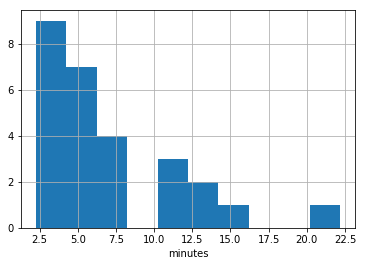

In [84]:
difference_between_form_and_book.hist()
plt.xlabel("minutes")
plt.show()

In [97]:
result.replace({'Phone': 0, 'Desktop': 1, 'Tablet': 2}, inplace=True)

In [104]:
diff_and_device = pd.DataFrame(columns=['TimeDiff', 'Device'])
diff_and_device['TimeDiff'] = difference_between_form_and_book
diff_and_device['Device'] = result['device']
diff_and_device

,TimeDiff,Device
0,6.750000,0
1,16.150000,1
3,11.166667,0
4,11.166667,0
5,13.650000,0
6,22.183333,0
7,3.450000,1
8,3.450000,1
9,4.183333,1
10,4.183333,1


In [108]:
print('Phone: ' + str(diff_and_device[diff_and_device['Device']==0].TimeDiff.mean()))
print('Desktop: ' + str(diff_and_device[diff_and_device['Device']==1].TimeDiff.mean()))
print('Tablet: ' + str(diff_and_device[diff_and_device['Device']==2].TimeDiff.mean()))

Phone: 8.165151515151514
Desktop: 6.7714285714285705
Tablet: 4.283333333333333
